# Atividade Computacional 2

PPGEE0018: Processamento Digital de Sinais.

Aluno: Ricardo Augusto de Araújo Machado

In [1]:
from scipy.io.wavfile import read
from pathlib import Path
import scipy.signal as sps
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (9, 6)
sns.set_theme(style="whitegrid")

Para realização da atividade foi utilizado uma gravação do tema de jazz "Round Midnight" com guitarra, bateria e baixo elétrico.

In [2]:
audio_path = Path('dados/round midnight.wav')
fs, dados_wav = read(audio_path)
dados_wav = dados_wav[:, 0]  # Pega apenas um canal do áudio

/tmp/ipykernel_68256/2992843450.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dados_wav = read(audio_path)


In [3]:
COMPRIMENTO_JANELA_MS = 30  # ms
NUM_PONTOS = int(COMPRIMENTO_JANELA_MS * fs / 1000)
hamming_window = sps.windows.hamming(NUM_PONTOS)
hann_window = sps.windows.hann(NUM_PONTOS)
blackman_window = sps.windows.blackman(NUM_PONTOS)

In [4]:
def plotar_espectrograma(dado_wav, window: np.ndarray, hop_size: int, fs: float) -> None:
    # Calcular a STFT
    freq, tempo, matriz_stft = sps.stft(dado_wav, fs=fs, window=window, nperseg=len(window), noverlap=len(window)-hop_size, scaling='spectrum')
    espectrograma_audio = np.abs(matriz_stft) ** 2

    # Limitar a frequência máxima para 2 kHz
    freq_max = 2000  # Hz
    idx_max = np.argmin(np.abs(freq - freq_max))
    freq = freq[:idx_max]
    espectrograma_audio = espectrograma_audio[:idx_max, :]

    # Plotar o espectrograma
    sns.heatmap(10 * np.log10(espectrograma_audio + 1e-10), cmap='flare_r')
    plt.xticks(ticks=np.linspace(0, len(tempo)-1, 10), labels=np.round(np.linspace(0, tempo[-1], 10), 2))
    plt.yticks(ticks=np.linspace(0, len(freq)-1, 10), labels=np.round(np.linspace(0, freq[-1], 10)/1000, 2))
    plt.xlabel('Tempo (s)')
    plt.ylabel('Frequência (kHz)')
    plt.title('Espectrograma do áudio (até 10 kHz)')
    plt.show()


Espectograma obtido com a janela de Blackman.

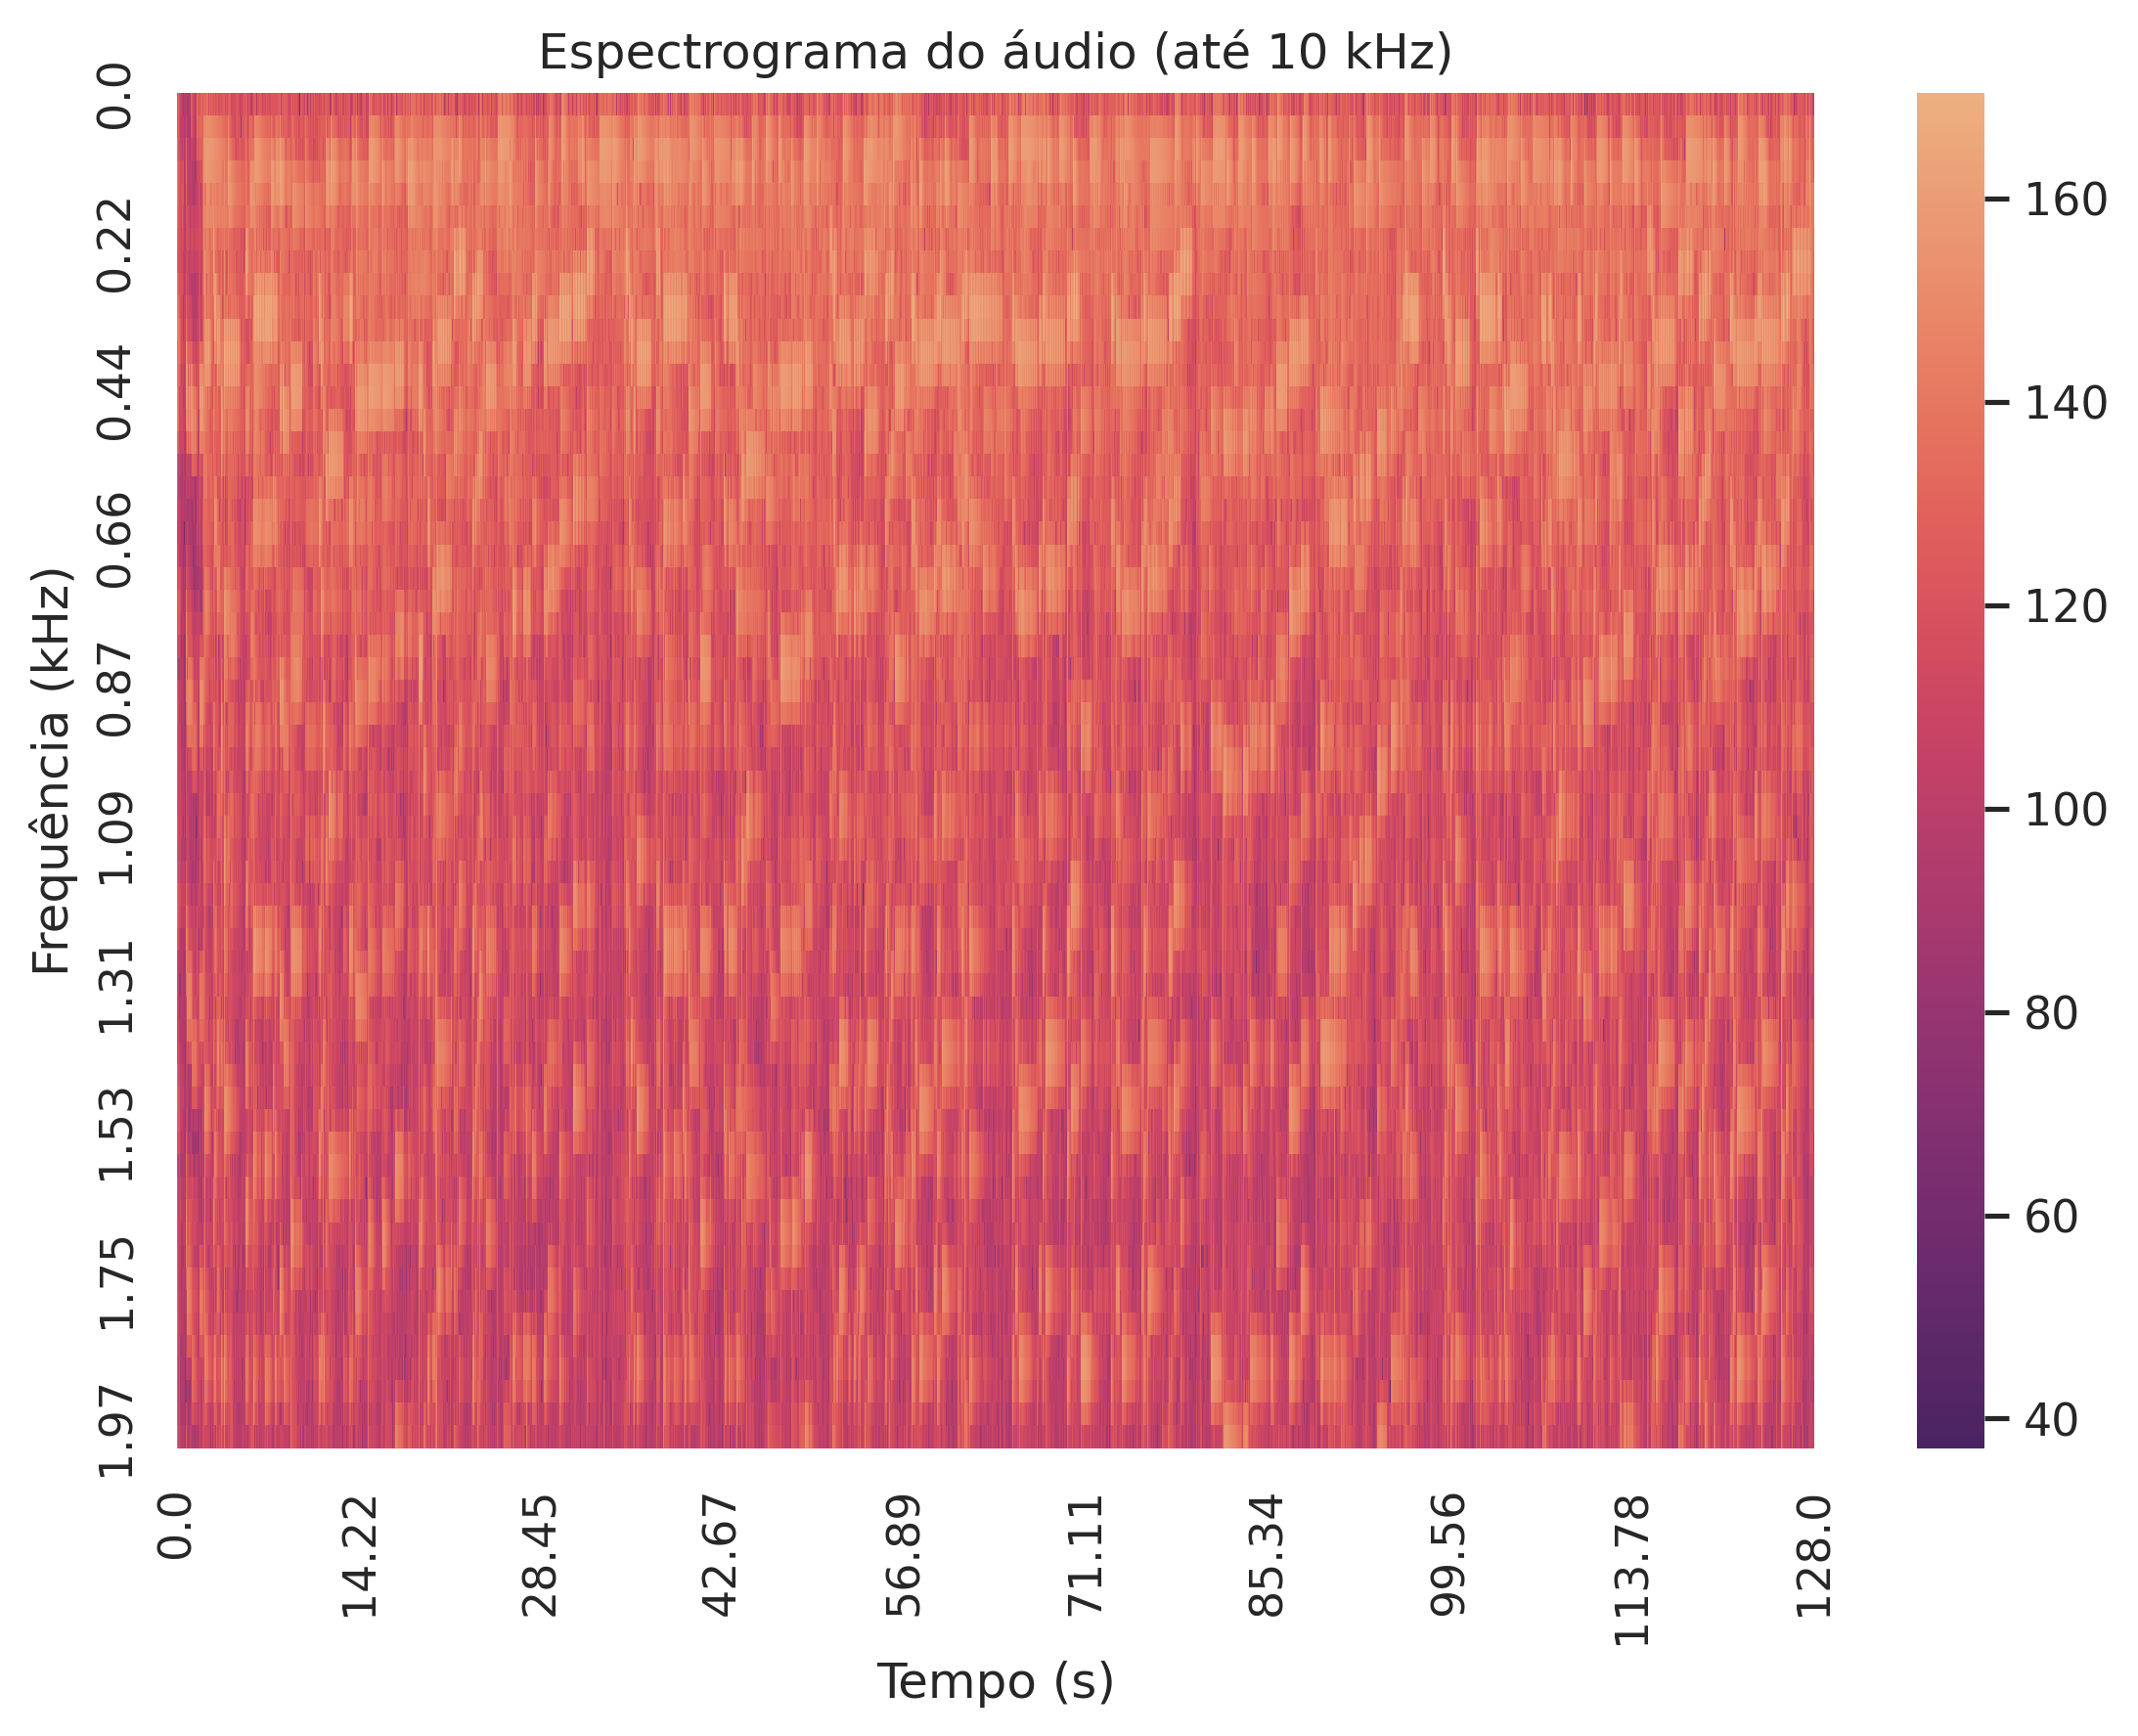

In [5]:
plotar_espectrograma(dados_wav, blackman_window, hop_size=NUM_PONTOS // 2, fs=fs)

Espectograma obtido com a janela de Hann.

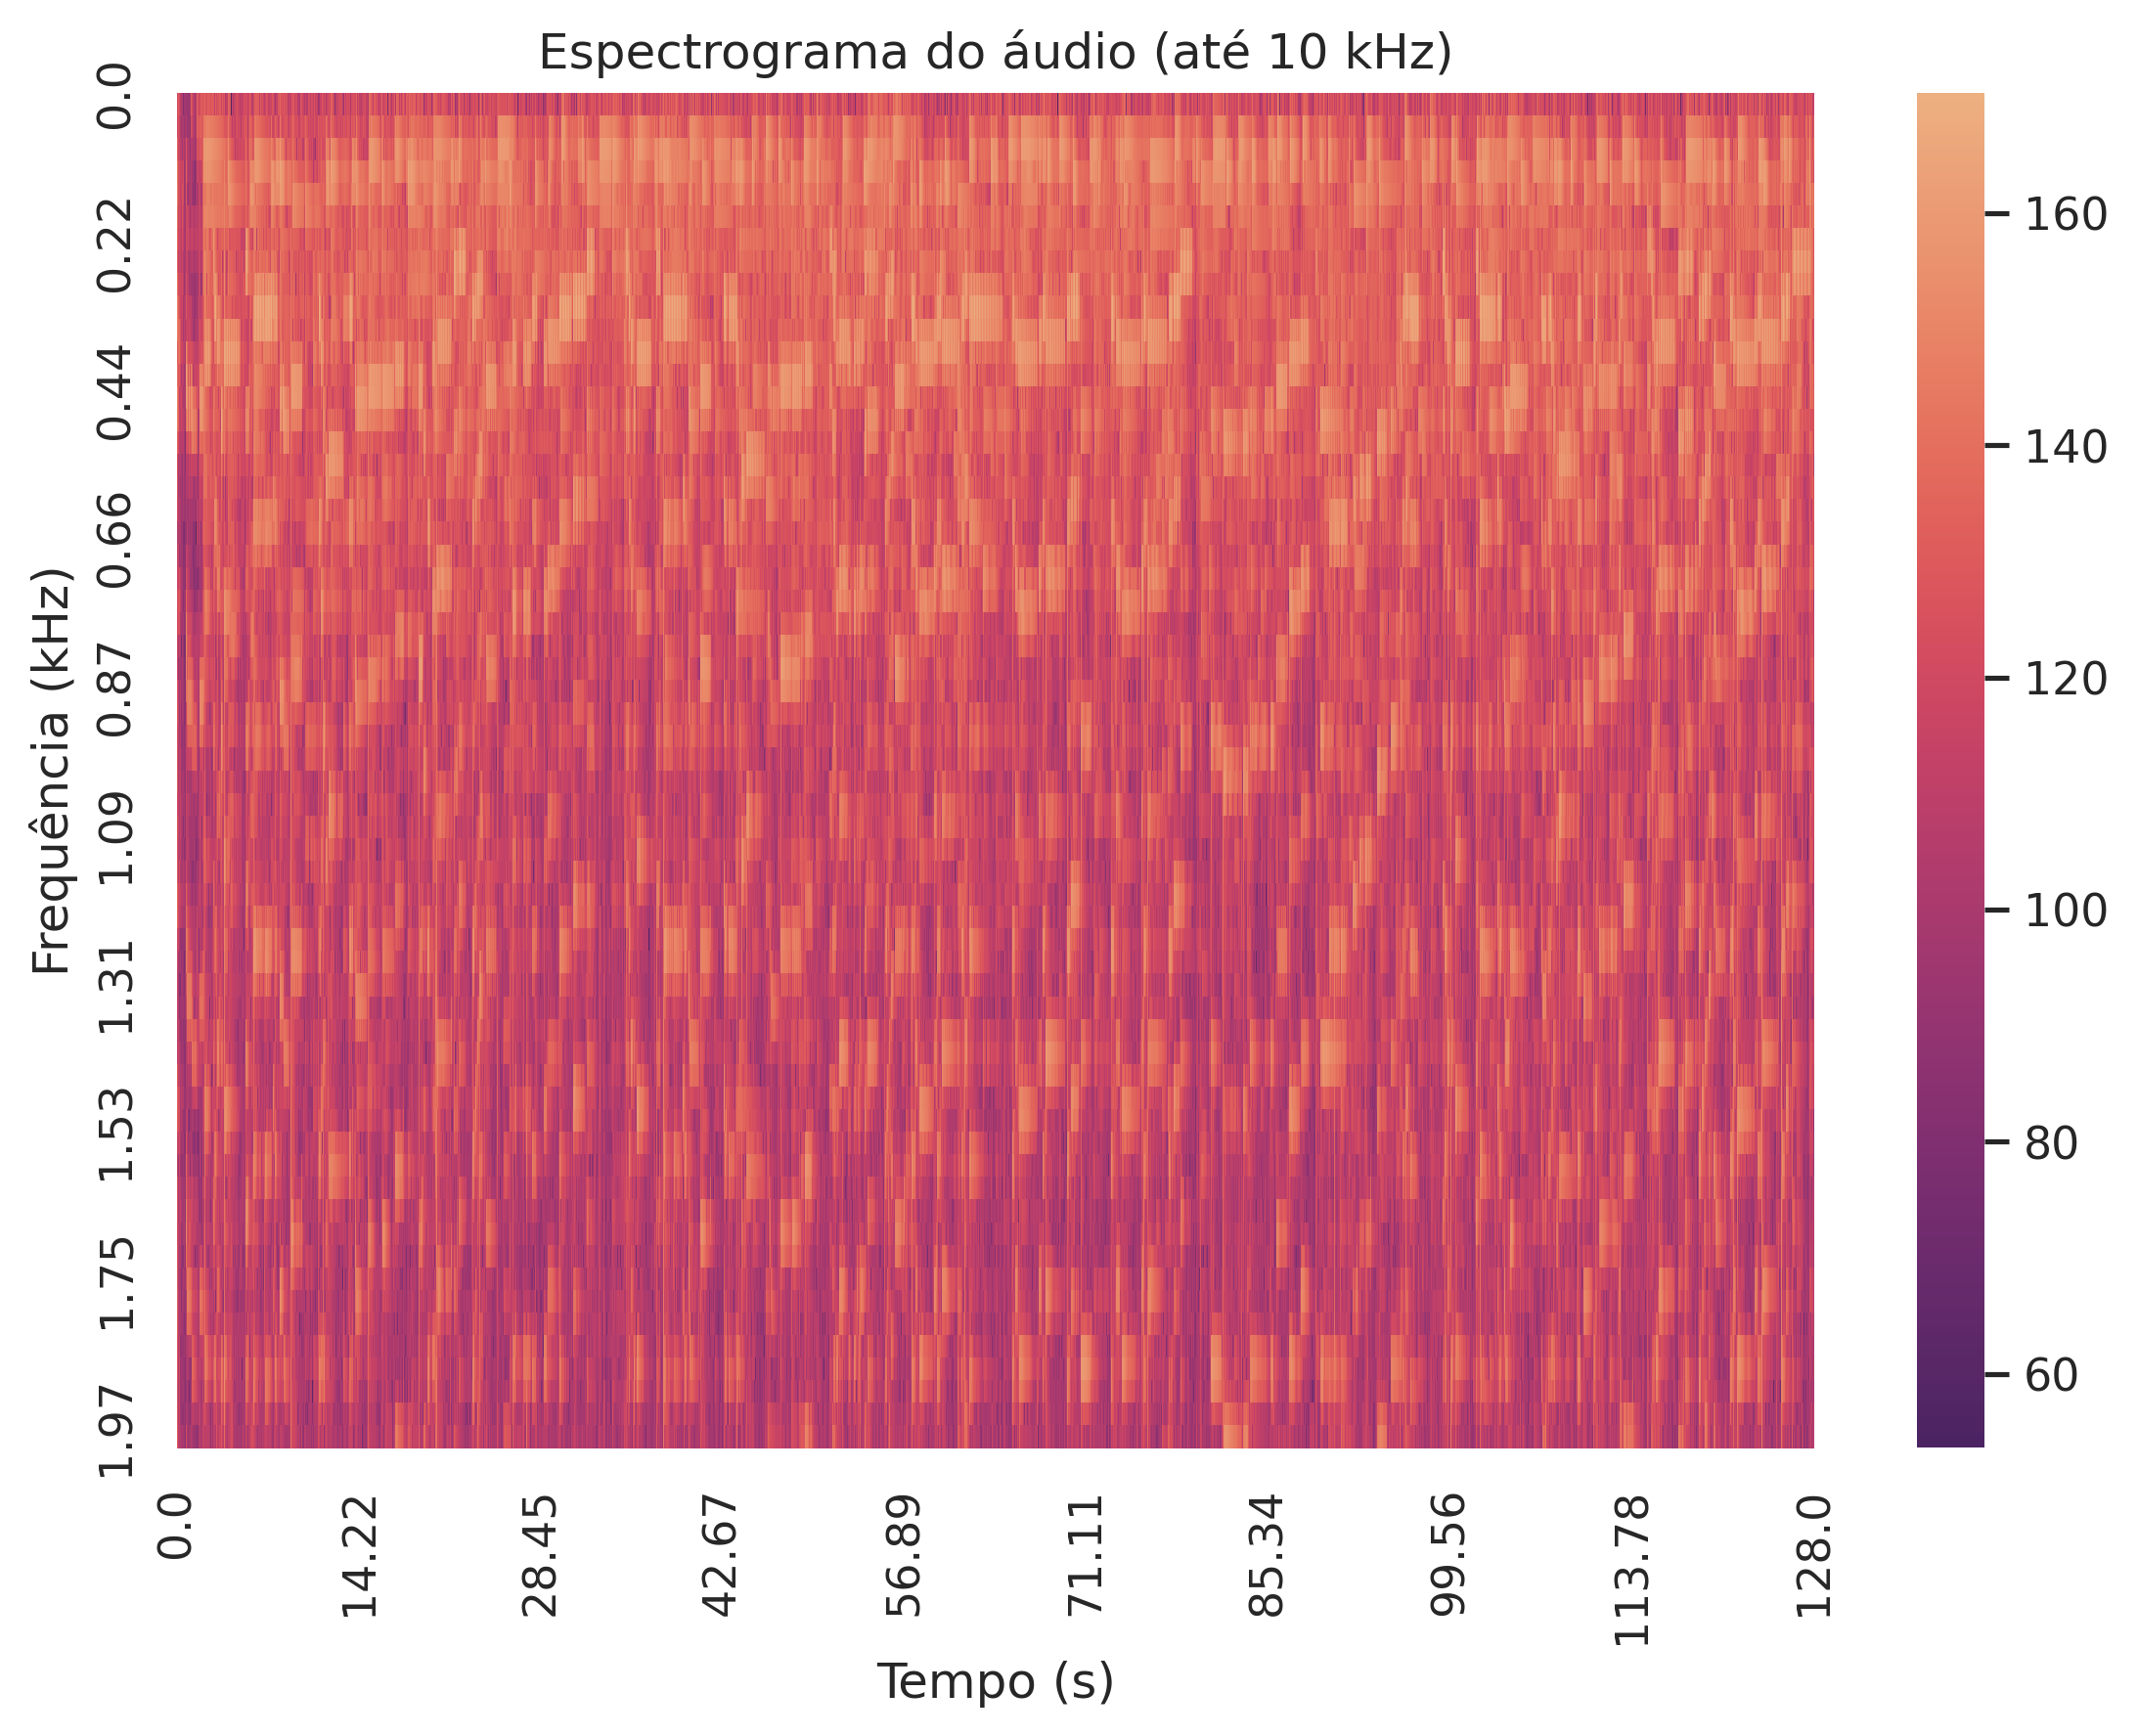

In [6]:
plotar_espectrograma(dados_wav, hann_window, hop_size=NUM_PONTOS // 2, fs=fs)

Espectograma obtido com a janela de Hamming.

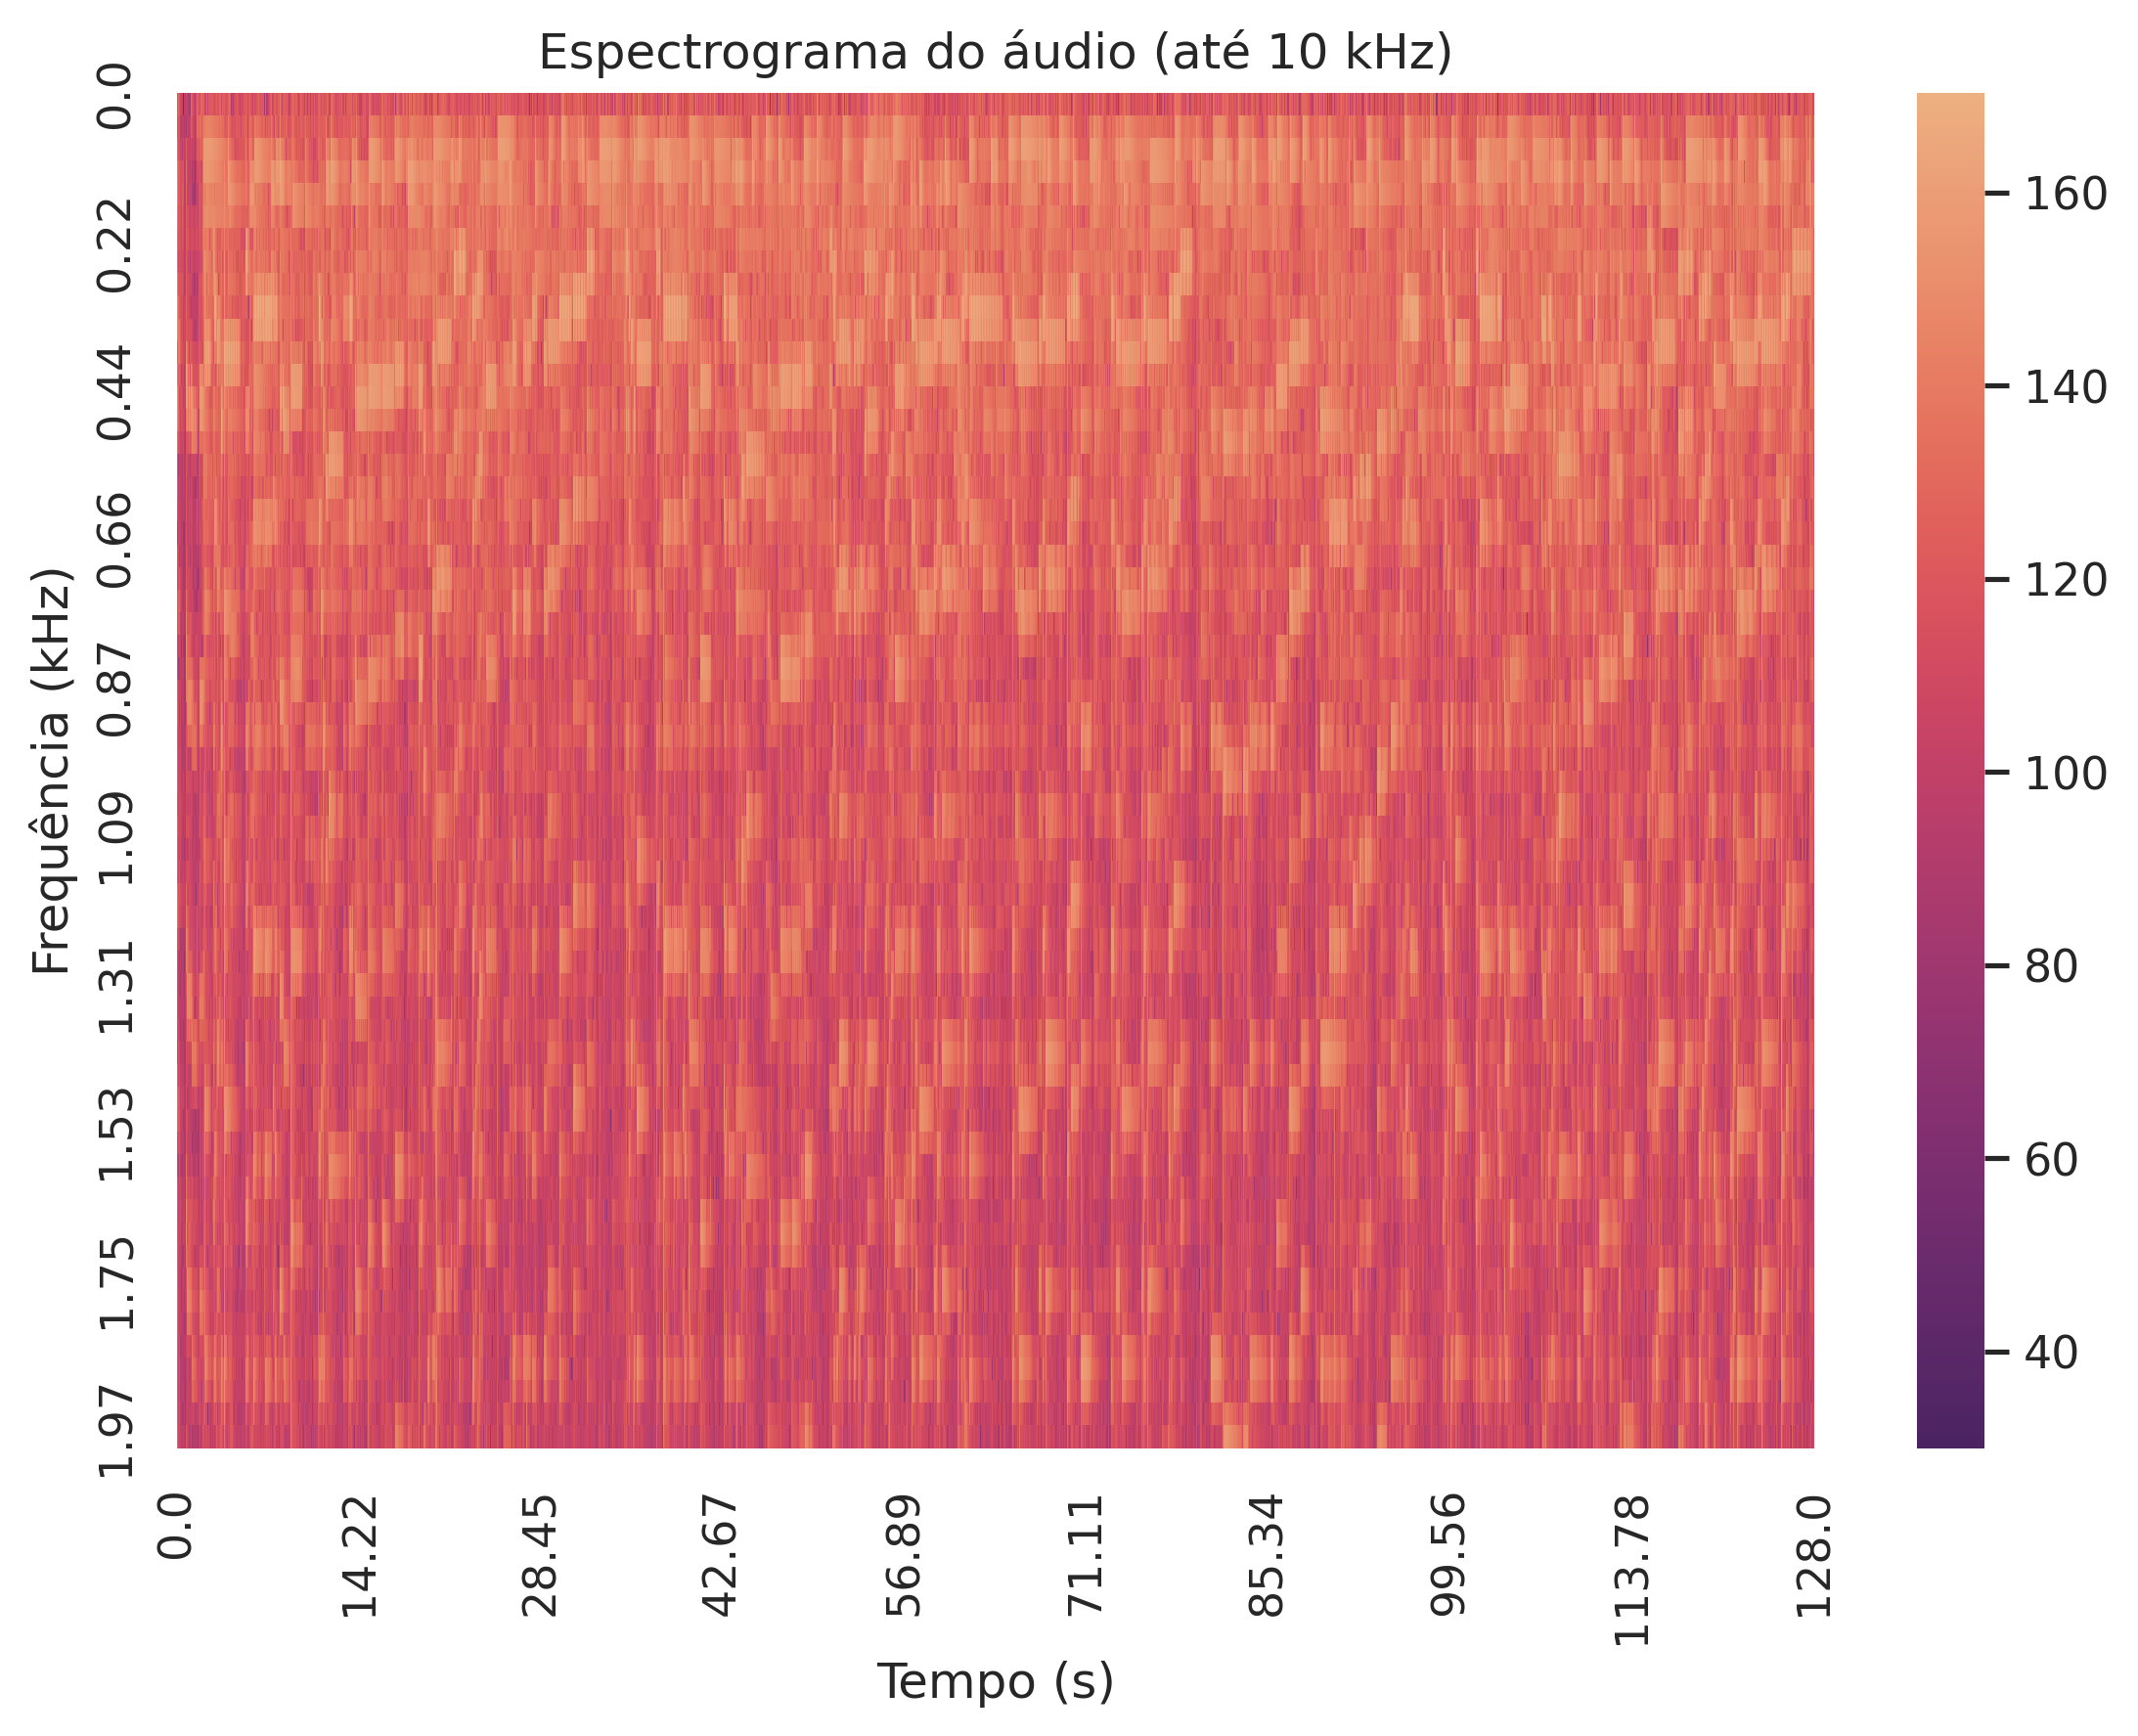

In [7]:
plotar_espectrograma(dados_wav, hamming_window, hop_size=NUM_PONTOS // 2, fs=fs)